Here are some examples of ways to visualize the 4D-data you get (some good and some not so good). The examples are using arbitray data sampled on a regular (l, b)-grid and thus is slightly different from what you want to do in real life (where you sample on a sphere). For this reason, projections we're not taken into account here and no interpolation was done.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
# observation ranges
# note: here b and l are sampled regularly, which is *not* what you want to do for your observations
# instead you want dl = 2/cos(b) ...
lmin, lmax = 160, 220
bmin, bmax = -70, -10
dl = db = 2
nl = (lmax-lmin)//dl
nb = (bmax-bmin)//db
l = np.linspace(lmin, lmax, nl)
b = np.linspace(bmin, bmax, nb)

# arbitrary range of velocities
v = np.linspace(-100, 100, 201)

# generate some random mock data
rng = np.random.default_rng()
tmax = 10
T = rng.random(size=(l.size, b.size, v.size)) * tmax
print(T.shape)

(30, 30, 201)


# Fixed (l, b)

<IPython.core.display.Javascript object>


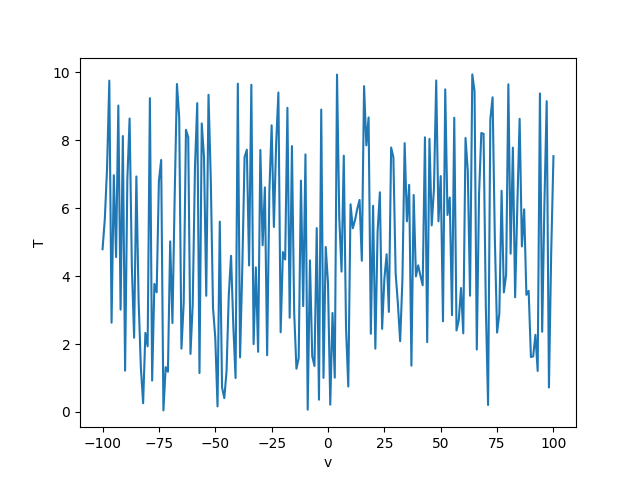

In [3]:
# visualize T vs v for a certain pointing (fixed l, b)

plt.figure()
plt.plot(v, T[0, 0])
plt.xlabel("v")
plt.ylabel("T")
plt.show()

# Average over v?

<IPython.core.display.Javascript object>


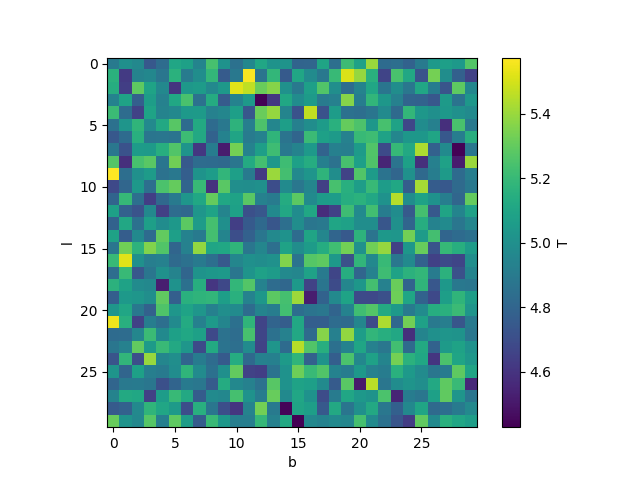

In [4]:
# could we average over v?
# We might end up losing important information about the speed!
t_vavg = T.mean(axis=-1)
plt.figure()
plt.imshow(t_vavg)
plt.xlabel("b")
plt.ylabel("l")
plt.colorbar(label="T")
plt.show()

# 3D-plot, color = Temp

<IPython.core.display.Javascript object>


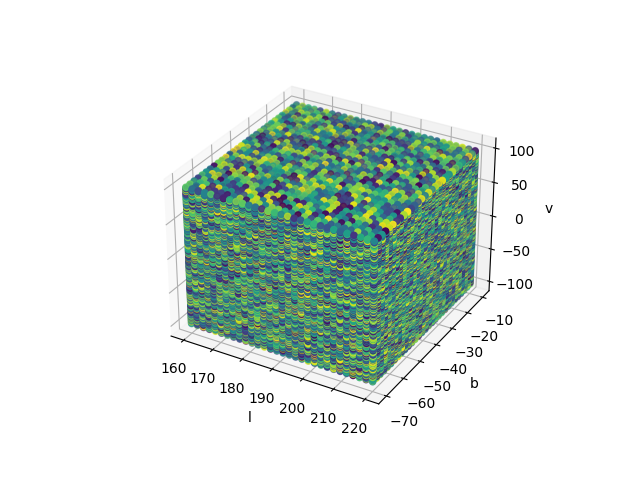

In [8]:
# let's try visualizing in 3D, with l, b, v as the axes and T as the color
# this is hard to see and you only see three faces of the cube (not the interior)

L, B, V = np.meshgrid(l, b, v)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(L, B, V, c=T.flatten())
ax.set_xlabel("l")
ax.set_ylabel("b")
ax.set_zlabel("v")
plt.show()

# 2D, weighted average

In [10]:
# an average of velocities, weighted by the amount of HI (which is proportional to T) at each coordinate
vel_avg = (T * v).sum(axis=-1)
vel_avg /= T.sum(axis=-1)

<IPython.core.display.Javascript object>


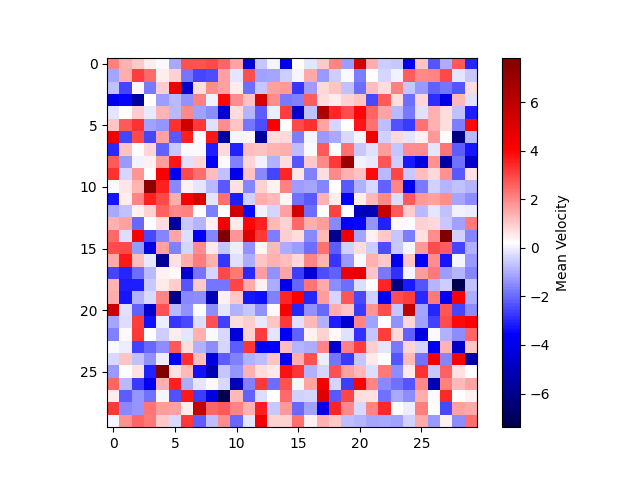

In [11]:
# using the average as the color
# what information did we lose? The amount of HI at each coordinate
plt.figure()
plt.imshow(vel_avg, cmap="seismic")
plt.colorbar(label="Mean Velocity")
plt.show()

# color: mean v, size: temp

<IPython.core.display.Javascript object>


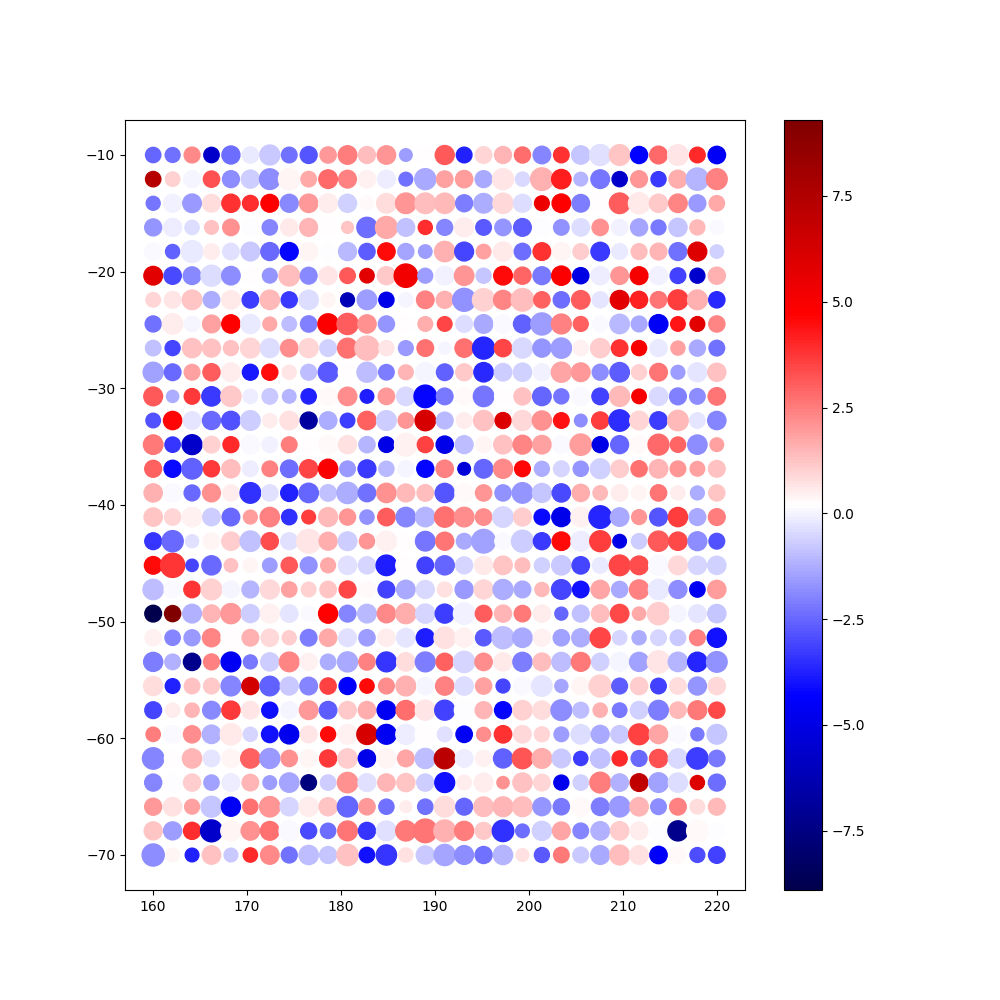

In [90]:
# finally, let's fix the issue above by making the amount of HI the size of each marker
# (to enhance differences and show that the sizes are actually different, I arbitrarily scaled it,
# you certainly don't want to do this!)

# here, bigger circles imply more HI and the color represents the avg speed

L, B = np.meshgrid(l, b)

plt.figure(figsize=(10,10))
plt.scatter(L, B, s=(T.mean(axis=-1))**6/100, c=vel_avg, cmap="seismic")
plt.colorbar()
plt.show()